<a href="https://colab.research.google.com/github/RafsanJany-44/VitalDB_Research_Initial/blob/main/wfdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q wfdb
!pip install -q neurokit2
!pip install -q biosppy
!pip install vitaldb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 3.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import wfdb
import neurokit2 as nk
import matplotlib.pyplot as plt
import os
import pandas as pd
import biosppy.signals.ecg as ecg
import random
from tqdm.notebook import tqdm
import vitaldb

In [9]:


vals = vitaldb.load_case(34, ['ECG_II','ART'], 1/100)
signal = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]

In [10]:
signal = np.array(signal).flatten()
signal_clean = nk.ecg_clean(signal, sampling_rate=500)

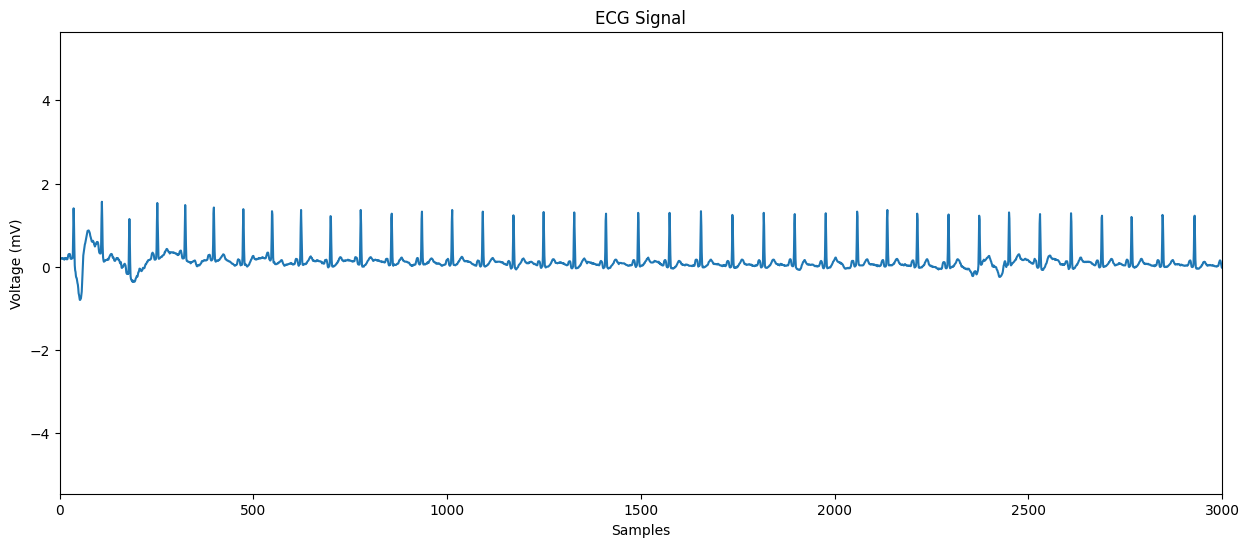

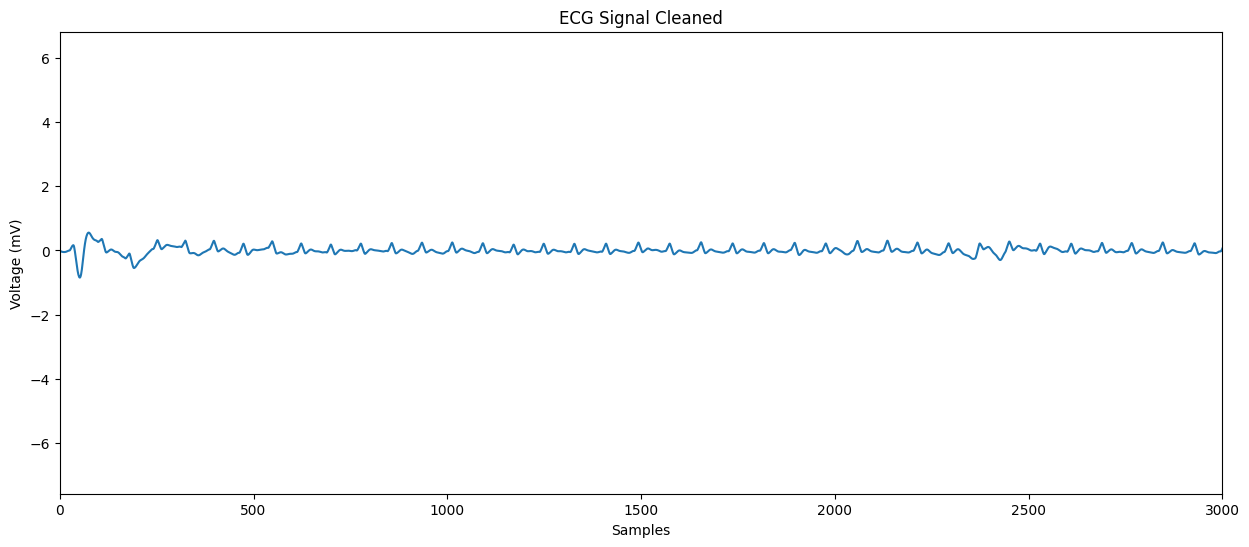

In [11]:
plt.figure(figsize=(15, 6))
plt.plot(signal)
plt.xlabel('Samples')
plt.ylabel('Voltage (mV)')
plt.title('ECG Signal')
plt.xlim( 0 , 3000)
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(signal_clean)
plt.xlabel('Samples')
plt.ylabel('Voltage (mV)')
plt.title('ECG Signal Cleaned')
plt.xlim( 0 , 3000)
plt.show()

In [12]:
features, _ = nk.ecg_process(signal_clean, sampling_rate=500)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


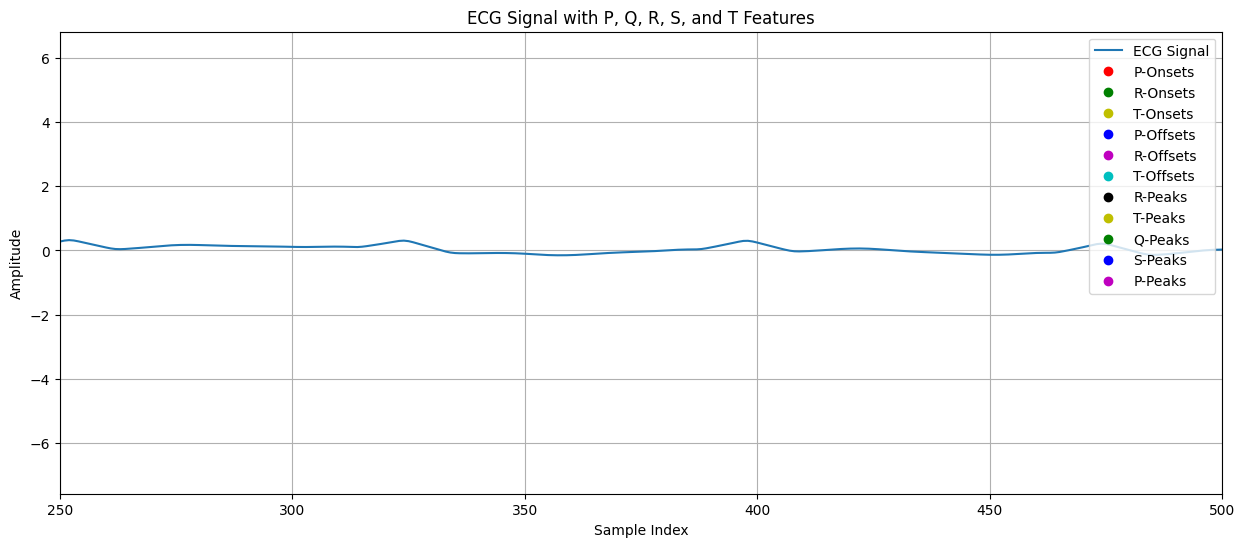

In [13]:
p_onsets = features["ECG_P_Onsets"]
r_onsets = features["ECG_R_Onsets"]
t_onsets = features["ECG_T_Onsets"]
p_offsets = features["ECG_P_Offsets"]
r_offsets = features["ECG_R_Offsets"]
t_offsets = features["ECG_T_Offsets"]
r_peaks = features["ECG_R_Peaks"]
t_peaks = features["ECG_T_Peaks"]
q_peaks = features["ECG_Q_Peaks"]
s_peaks = features["ECG_S_Peaks"]
p_peaks = features["ECG_P_Peaks"]
heart_rate = features["ECG_Rate"]

# signal_clean = signal_clean[:100000]
plt.figure(figsize=(15, 6))
plt.plot(signal_clean, label="ECG Signal")
samples = np.arange(len(signal_clean))

p_onsets_mask = p_onsets == 1
p_onsets_idx = samples[p_onsets_mask]
plt.plot(samples[p_onsets_mask], signal_clean[p_onsets_mask], 'ro', label="P-Onsets")

r_onsets_mask = r_onsets == 1
r_onsets_idx = samples[r_onsets_mask]
plt.plot(samples[r_onsets_mask], signal_clean[r_onsets_mask], 'go', label="R-Onsets")

t_onsets_mask = t_onsets == 1
t_onsets_idx = samples[t_onsets_mask]
plt.plot(samples[t_onsets_mask], signal_clean[t_onsets_mask], 'yo', label="T-Onsets")

p_offsets_mask = p_offsets == 1
p_offsets_idx = samples[p_offsets_mask]
plt.plot(samples[p_offsets_mask], signal_clean[p_offsets_mask], 'bo', label="P-Offsets")

r_offsets_mask = r_offsets == 1
r_offsets_idx = samples[r_offsets_mask]
plt.plot(samples[r_offsets_mask], signal_clean[r_offsets_mask], 'mo', label="R-Offsets")

t_offsets_mask = t_offsets == 1
t_offsets_idx = samples[t_offsets_mask]
plt.plot(samples[t_offsets_mask], signal_clean[t_offsets_mask], 'co', label="T-Offsets")

r_peaks_mask = r_peaks == 1
r_peaks_idx = samples[r_peaks_mask]
plt.plot(samples[r_peaks_mask], signal_clean[r_peaks_mask], 'ko', label="R-Peaks")

t_peaks_mask = t_peaks == 1
t_peaks_idx = samples[t_peaks_mask]
plt.plot(samples[t_peaks_mask], signal_clean[t_peaks_mask], 'yo', label="T-Peaks")

q_peaks_mask = q_peaks == 1
q_peaks_idx = samples[q_peaks_mask]
plt.plot(samples[q_peaks_mask], signal_clean[q_peaks_mask], 'go', label="Q-Peaks")

s_peaks_mask = s_peaks == 1
s_peaks_idx = samples[s_peaks_mask]
plt.plot(samples[s_peaks_mask], signal_clean[s_peaks_mask], 'bo', label="S-Peaks")

p_peaks_mask = p_peaks == 1
p_peaks_idx = samples[p_peaks_mask]
plt.plot(samples[p_peaks_mask], signal_clean[p_peaks_mask], 'mo', label="P-Peaks")

plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("ECG Signal with P, Q, R, S, and T Features")
plt.grid()

plt.xlim(250, 500)
plt.show()



---



---



In [ ]:
beats = nk.ecg_segment(signal_clean, sampling_rate=500)

In [ ]:
def r_wave_amplitude(r_peak_loc):
    if len(r_peak_loc) >= 1:
        r_amplitude = float(r_peak_loc.values[0])
        return r_amplitude
    return np.nan

def r_wave_duration(q_peak_loc, t_onset_loc):
    if len(q_peak_loc) >= 1 and len(t_onset_loc) >= 1:
        r_duration = float(q_peak_loc.index[0] - t_onset_loc.index[0])
        return r_duration
    return np.nan

def t_wave_amplitude(t_peak_loc):
    if len(t_peak_loc) >= 1:
        t_amplitude = float(t_peak_loc.values[0])
        return t_amplitude
    return np.nan

def t_wave_duration(t_offset_loc, t_onset_loc):
    if len(t_offset_loc) >= 1 and len(t_onset_loc) >= 1:
        t_duration = float(t_offset_loc.index[0] - t_onset_loc.index[0])
        return t_duration
    return np.nan

def s_wave_amplitude(s_peak_loc):
    if len(s_peak_loc) >= 1:
        s_amplitude = float(s_peak_loc.values[0])
        return s_amplitude
    return np.nan

def qt_interval(t_offset_loc, p_offset_loc):
    if len(t_offset_loc) >= 1 and len(p_offset_loc) >= 1:
        qt_interval = float(t_offset_loc.index[0] - p_offset_loc.index[0])
        return qt_interval
    return np.nan

def heart_rate_calc(hr, idx):
    if idx > 0:
        return float(hr[idx])
    return np.nan


def j_point_calc(s_peak_loc, t_peak_loc, x, y):
    if len(s_peak_loc) == 0 or len(t_peak_loc) == 0:
        return np.nan, np.nan, None
    if s_peak_loc.index[0] > t_peak_loc.index[0]:
        return np.nan, np.nan, None
    s_peak_ind = int(np.interp(s_peak_loc.index[0], x, np.arange(len(x))))
    t_peak_ind = int(np.interp(t_peak_loc.index[0], x, np.arange(len(x))))
    y_st_by_peaks = y[s_peak_ind:t_peak_ind+1]
    x_st_by_peaks = x[s_peak_ind:t_peak_ind+1]
    if t_peak_ind - s_peak_ind < 1:
        return np.nan, np.nan, None
    Fy = np.gradient(y_st_by_peaks)
    j_point_pseudo_ind = np.abs(Fy).argmin()
    j_point = [x_st_by_peaks[j_point_pseudo_ind], y_st_by_peaks[j_point_pseudo_ind]]
    j_point_ind = int(np.round(np.interp(x_st_by_peaks[j_point_pseudo_ind], x, np.arange(len(x)))))
    j_magnitude = j_point[1]

    return j_point, j_magnitude, j_point_ind

def st_duration_calc(t_peak_loc, j_point):
    if len(t_peak_loc) >= 1 and isinstance(j_point, list) and len(j_point) == 2:
        st_duration = t_peak_loc.index[0] - j_point[0]
        return st_duration
    return np.nan

def st_slope_calc(t_onset_loc, j_point_ind, x, y):
    if len(t_onset_loc) >= 1 and j_point_ind is not None:
        t_onset_ind = int(np.round(np.interp(t_onset_loc.index[0], x, np.arange(len(x)))))

        if t_onset_ind > j_point_ind:
            y_st_slope_range = y[j_point_ind:t_onset_ind+1]
            x_st_slope_range = x[j_point_ind:t_onset_ind+1]

            F_st_slope = np.gradient(y_st_slope_range)
            st_slope = np.mean(F_st_slope)
            st_slope_bool = st_slope > 0
            return st_slope
    return np.nan

def st_area_calc(t_offset_loc, j_point_ind, x, y,):
    if len(t_offset_loc) >= 1 and j_point_ind is not None:
        ind_t_offset = int(np.round(np.interp(t_offset_loc.index[0], x, np.arange(len(x)))))
        y_st_area_range = y[j_point_ind:ind_t_offset+1]
        x_st_area_range = x[j_point_ind:ind_t_offset+1]
        st_area = np.trapz(y_st_area_range, x_st_area_range)
        return st_area
    return np.nan


In [ ]:
def extract_features(beats, features, ranges, gender):
    
    p_onsets = features["ECG_P_Onsets"]
    r_onsets = features["ECG_R_Onsets"]
    t_onsets = features["ECG_T_Onsets"]
    p_offsets = features["ECG_P_Offsets"]
    r_offsets = features["ECG_R_Offsets"]
    t_offsets = features["ECG_T_Offsets"]
    r_peaks = features["ECG_R_Peaks"]
    t_peaks = features["ECG_T_Peaks"]
    q_peaks = features["ECG_Q_Peaks"]
    s_peaks = features["ECG_S_Peaks"]
    p_peaks = features["ECG_P_Peaks"]
    heart_rate = features["ECG_Rate"]

    record_dataset = pd.DataFrame(columns=['R_wave_amplitude', 'R_wave_duration', 'T_wave_amplitude', 'T_wave_duration', 'S_wave_amplitude', 'QT_interval', 'Heart_rate','J_point_amplitude', 'ST_duration', 'ST_area', 'ST_slope', 'Gender', 'Label'])
    
    for i in range(1, len(beats)+1):
        # print("Beat Number:", i)
        beat = beats[str(i)]
        beat_signal = beat['Signal']
        time = beat_signal.index
        voltage = beat_signal.values
        beat_idx = beat['Index'].values
        min_idx, max_idx = beat_idx[0], beat_idx[-1]

        s_peak_loc = beat_signal.iloc[np.argwhere(s_peaks[min_idx:max_idx].values == 1).flatten()]
        r_onset_loc = beat_signal.iloc[np.argwhere(r_onsets[min_idx:max_idx].values == 1).flatten()]
        t_onset_loc = beat_signal.iloc[np.argwhere(t_onsets[min_idx:max_idx].values == 1).flatten()]
        p_offset_loc = beat_signal.iloc[np.argwhere(p_offsets[min_idx:max_idx].values == 1).flatten()]
        r_offset_loc = beat_signal.iloc[np.argwhere(r_offsets[min_idx:max_idx].values == 1).flatten()]
        t_offset_loc = beat_signal.iloc[np.argwhere(t_offsets[min_idx:max_idx].values == 1).flatten()]
        r_peak_loc = beat_signal.iloc[np.argwhere(r_peaks[min_idx:max_idx].values == 1).flatten()]
        t_peak_loc = beat_signal.iloc[np.argwhere(t_peaks[min_idx:max_idx].values == 1).flatten()]
        q_peak_loc = beat_signal.iloc[np.argwhere(q_peaks[min_idx:max_idx].values == 1).flatten()]
        label = 0

        for start, end in ranges:
            if start <= min_idx and end >= max_idx:
                label = 1
                break
        
        r_amplitude = r_wave_amplitude(r_peak_loc)
        r_duration = r_wave_duration(q_peak_loc, r_onset_loc)
        t_amplitude = t_wave_amplitude(t_peak_loc)
        t_duration = t_wave_duration(t_offset_loc, t_onset_loc)
        s_amplitude = s_wave_amplitude(s_peak_loc)
        qt_int = qt_interval(t_offset_loc, p_offset_loc)
        hr = heart_rate_calc(heart_rate, (min_idx + max_idx) // 2)
        j_point, j_magnitude, j_point_ind = j_point_calc(s_peak_loc, t_peak_loc, time, voltage)
        st_duration = st_duration_calc(t_peak_loc, j_point)
        st_slope = st_slope_calc(t_onset_loc, j_point_ind, time, voltage)
        st_area = st_area_calc(t_offset_loc, j_point_ind, time, voltage)


        feature_row = {
            'R_wave_amplitude': r_amplitude,
            'R_wave_duration': r_duration,
            'T_wave_amplitude': t_amplitude,
            'T_wave_duration': t_duration,
            'S_wave_amplitude': s_amplitude,
            'QT_interval': qt_int,
            'Heart_rate': hr,
            'J_point_amplitude': j_magnitude,
            'ST_duration': st_duration,
            'ST_area': st_area,
            'ST_slope': st_slope,
            'Gender': gender,
            'Label': label
        }

        p = random.random()
        feature_row = pd.DataFrame([feature_row])

        if feature_row.isna().any().any():
            continue
        elif label == 1:
            record_dataset = pd.concat([record_dataset, feature_row], ignore_index=True)
        elif p < 0.5:
            record_dataset = pd.concat([record_dataset, feature_row], ignore_index=True)

    return record_dataset

In [ ]:
random.shuffle(record_nums)
split_point = int(len(record_nums) * 0.7)
train_record_nums = record_nums[:split_point]
test_record_nums = record_nums[split_point:]

In [ ]:
def create_dataset(records):
    dataset = pd.DataFrame(columns=['R_wave_amplitude', 'R_wave_duration', 'T_wave_amplitude', 'T_wave_duration', 'S_wave_amplitude', 'QT_interval', 'Heart_rate','J_point_amplitude', 'ST_duration', 'ST_area', 'ST_slope', 'Gender', 'Label'])
    for i in records:

        # Signal Information Extraction
        record_name = 'e0' + str(i) if i < 1000 else 'e' + str(i)
        record_name = 'edb/' + record_name
        signal, fields = wfdb.rdsamp(record_name, channels=[0])
        gender = 1 if 'Sex: F' in fields['comments'][0] else 0
        signal = np.array(signal).flatten()
        fs = fields['fs']

        # Signal Cleaning
        signal_clean = nk.ecg_clean(signal, sampling_rate=fs)

        # Annotation Extraction
        annotation = wfdb.rdann(record_name, 'atr')
        ann_symbol = np.array(annotation.symbol)
        ann_sample = np.array(annotation.sample)
        aux_note = np.array(annotation.aux_note)
        st_annotations_idx = ann_sample[ann_symbol == 's']
        st_annotations = aux_note[ann_symbol == 's']
        ranges = match_parentheses(st_annotations, st_annotations_idx)

        # Low-level Feature Extraction
        features, _ = nk.ecg_process(signal_clean, sampling_rate=fs)

        # Beat Segmentation
        beats = nk.ecg_segment(signal_clean, sampling_rate=fs)

        # Dataset Extraction and Concatenation
        record_dataset = extract_features(beats, features, ranges, gender)
        dataset = pd.concat([dataset, record_dataset], axis=0)
        
    return dataset

In [ ]:
train_dataset = create_dataset(train_record_nums)
test_dataset = create_dataset(test_record_nums)
train_dataset.to_csv('train_data.csv', index=False)
test_dataset.to_csv('test_data.csv', index=False)